In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt

# Netflix: Investigating the Netflix movie dataset to understand the attributes of highly rated movies

## Read the CSV file

In [2]:
df = pd.read_csv('n_movies.csv')

In [3]:
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [4]:
# Checking what we can change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


## Cleaning Steps

In [5]:
# Making adjustments to the columns 

df['duration'] = df['duration'].str.extract('(\d+)').astype(float)


df['votes'] = df['votes'].str.replace(',', '').astype(float)

df['StartYear'] = df['year'].str.extract(r'\((\d{4})').astype(float)

df['StartYear'] = pd.to_datetime(df['StartYear'], format='%Y')

df = df.drop('year', axis=1)

In [6]:
# Renaming the columns

df = df.rename(columns={'title': 'Title'})

df = df.rename(columns={'year': 'Year'})

df = df.rename(columns={'certificate': 'Certificate'})

df = df.rename(columns={'duration': 'Duration(mins)'})

df = df.rename(columns={'genre': 'Genre'})

df = df.rename(columns={'rating': 'Rating'})

df = df.rename(columns={'description': 'Description'})

df = df.rename(columns={'stars': 'Stars'})

df = df.rename(columns={'votes': 'Votes'})

In [53]:
# Filling the nan values in certificate column

df['Certificate'].fillna('Not Rated', inplace=True)

# Filling the nan values in Genres column

df['Genre'].fillna('Unknown', inplace=True)

# Filling the nan values in Duration Column

df['Duration(mins)'].fillna('Unknown', inplace=True)

df['Duration(mins)'] = df['Duration(mins)'].astype(int)

In [54]:
# Creating << protagonist >> column 

df['Protagonist'] = df['Stars'].str.split(',', expand=True)[0]

df['Protagonist'] = df['Protagonist'].str.replace("[\['']", "", regex=True)

df = df[df['Protagonist'] != ']']

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9554 entries, 0 to 9956
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            9554 non-null   object        
 1   Certificate      9554 non-null   object        
 2   Duration(mins)   9554 non-null   int32         
 3   Genre            9554 non-null   object        
 4   Rating           8683 non-null   float64       
 5   Description      9554 non-null   object        
 6   Stars            9554 non-null   object        
 7   Votes            8683 non-null   float64       
 8   StartYear        9179 non-null   datetime64[ns]
 9   Protagonist      9554 non-null   object        
 10  WeightedAverage  8683 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 858.4+ KB


## Calculating the weighted average for our research

In [55]:
vote_weight = 0.7

rating_weight = 0.3

df['WeightedAverage'] = (df['Votes'] * vote_weight + df['Rating'] * rating_weight) / (vote_weight + rating_weight)



In [56]:
#sorting the df based on weighted average

df_sorted = df.sort_values('WeightedAverage', ascending=False)

#dropping duplicate values based on Title

df_sorted = df_sorted.drop_duplicates(subset='Title', keep='first')

In [57]:
df_1 = df_sorted

In [58]:
# dropping nan values

df_cleaned = df_1.dropna(subset=['WeightedAverage', 'Protagonist','Genre'])

In [59]:
df_cleaned

,Title,Certificate,Duration(mins),Genre,Rating,Description,Stars,Votes,StartYear,Protagonist,WeightedAverage
9921,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075.0,2001-01-01,Peter Jackson,1290855.14
9951,Breaking Bad,TV-MA,49,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359.0,2008-01-01,Bryan Cranston,1281954.15
57,The Lord of the Rings: The Return of the King,PG-13,201,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0,2003-01-01,Peter Jackson,1273412.60
78,The Lord of the Rings: The Two Towers,PG-13,179,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0,2002-01-01,Peter Jackson,1149898.24
153,Gladiator,R,155,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0,2000-01-01,Ridley Scott,1037074.25
...,...,...,...,...,...,...,...,...,...,...,...
6216,Sergio over de grens,Not Rated,74,Reality-TV,7.2,Add a Plot,"['Sergio Herman, ', 'Ella Leyers, ', 'Kürt Rog...",6.0,2022-01-01,Sergio Herman,6.36
7892,Patrick Maia: Home Office - Um show em casa,Not Rated,74,Comedy,6.5,"In his second comedy special, Patrick opens th...","['Patrick Maia', '| ', ' Star:', 'Patrick M...",6.0,2017-01-01,Patrick Maia,6.15
5765,Towies,Not Rated,30,Reality-TV,6.2,An Australian towing company's staff take on a...,"['Adrian Jarrett, ', 'Mike, ', 'Spooney, ', 'J...",6.0,2016-01-01,Adrian Jarrett,6.06
6629,Sitara,Not Rated,128,Drama,8.0,Add a Plot,"['Ashish Ray', '| ', ' Stars:', 'Raima Sen,...",5.0,2019-01-01,Ashish Ray,5.90


In [39]:
len(df_cleaned["Genre"].unique())

545

In [40]:
df_cleaned

,Title,Certificate,Duration(mins),Genre,Rating,Description,Stars,Votes,StartYear,Protagonist,WeightedAverage
9921,The Lord of the Rings: The Fellowship of the Ring,PG-13,178.000000,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075.0,2001-01-01,Peter Jackson,1290855.14
9951,Breaking Bad,TV-MA,49.000000,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359.0,2008-01-01,Bryan Cranston,1281954.15
57,The Lord of the Rings: The Return of the King,PG-13,201.000000,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0,2003-01-01,Peter Jackson,1273412.60
78,The Lord of the Rings: The Two Towers,PG-13,179.000000,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0,2002-01-01,Peter Jackson,1149898.24
153,Gladiator,R,155.000000,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0,2000-01-01,Ridley Scott,1037074.25
...,...,...,...,...,...,...,...,...,...,...,...
6216,Sergio over de grens,Not Rated,74.155023,Reality-TV,7.2,Add a Plot,"['Sergio Herman, ', 'Ella Leyers, ', 'Kürt Rog...",6.0,2022-01-01,Sergio Herman,6.36
7892,Patrick Maia: Home Office - Um show em casa,Not Rated,74.155023,Comedy,6.5,"In his second comedy special, Patrick opens th...","['Patrick Maia', '| ', ' Star:', 'Patrick M...",6.0,2017-01-01,Patrick Maia,6.15
5765,Towies,Not Rated,30.000000,Reality-TV,6.2,An Australian towing company's staff take on a...,"['Adrian Jarrett, ', 'Mike, ', 'Spooney, ', 'J...",6.0,2016-01-01,Adrian Jarrett,6.06
6629,Sitara,Not Rated,128.000000,Drama,8.0,Add a Plot,"['Ashish Ray', '| ', ' Stars:', 'Raima Sen,...",5.0,2019-01-01,Ashish Ray,5.90


In [41]:
# finding most frequent genres


df_cleaned.groupby('Genre').count().sort_values('Title',ascending=False).head(10)

,Title,Certificate,Duration(mins),Rating,Description,Stars,Votes,StartYear,Protagonist,WeightedAverage
Genre,,,,,,,,,,
Comedy,684,684,684,684,684,684,684,684,684,684
Documentary,397,397,397,397,397,397,397,397,397,397
Drama,386,386,386,386,386,386,386,386,386,386
"Animation, Action, Adventure",229,229,229,229,229,229,229,229,229,229
"Comedy, Drama",208,208,208,208,208,208,208,208,208,208
"Drama, Romance",200,200,200,200,200,200,200,200,200,200
"Comedy, Drama, Romance",158,158,158,158,158,158,158,158,158,158
"Comedy, Romance",147,147,147,147,147,147,147,147,147,147
"Action, Crime, Drama",133,133,133,133,133,133,133,133,133,133


## Visualization

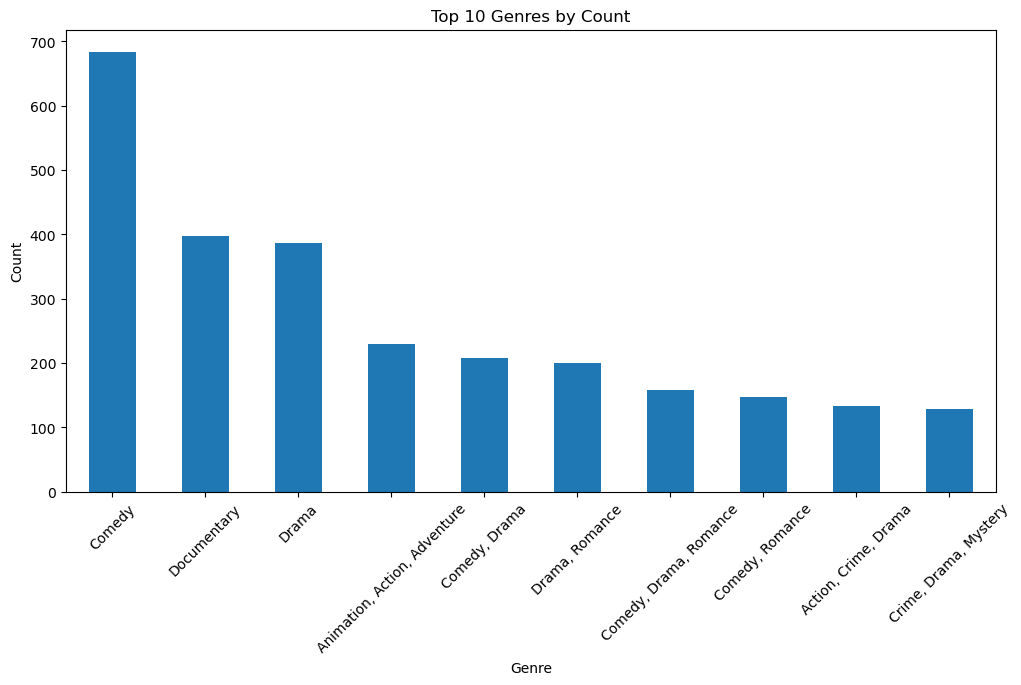

In [42]:
import matplotlib.pyplot as plt

top_10_genres = df_cleaned.groupby('Genre').count().sort_values('Title', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_genres['Title'].plot.bar()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Genres by Count')
plt.xticks(rotation=45)
plt.show()

In [43]:
df_cleaned.sort_values('WeightedAverage',ascending=False).head(10)

,Title,Certificate,Duration(mins),Genre,Rating,Description,Stars,Votes,StartYear,Protagonist,WeightedAverage
9921,The Lord of the Rings: The Fellowship of the Ring,PG-13,178.0,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075.0,2001-01-01,Peter Jackson,1290855.14
9951,Breaking Bad,TV-MA,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359.0,2008-01-01,Bryan Cranston,1281954.15
57,The Lord of the Rings: The Return of the King,PG-13,201.0,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0,2003-01-01,Peter Jackson,1273412.60
78,The Lord of the Rings: The Two Towers,PG-13,179.0,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0,2002-01-01,Peter Jackson,1149898.24
153,Gladiator,R,155.0,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0,2000-01-01,Ridley Scott,1037074.25
173,The Departed,R,151.0,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,"['Martin Scorsese', '| ', ' Stars:', 'Leona...",1310171.0,2006-01-01,Martin Scorsese,917122.25
96,Titanic,PG-13,194.0,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,"['James Cameron', '| ', ' Stars:', 'Leonard...",1158746.0,1997-01-01,James Cameron,811124.57
9948,Stranger Things,TV-14,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149902.0,2016-01-01,Millie Bobby Brown,804934.01
161,Léon: The Professional,R,110.0,"Action, Crime, Drama",8.5,12-year-old Mathilda is reluctantly taken in b...,"['Luc Besson', '| ', ' Stars:', 'Jean Reno,...",1147345.0,1994-01-01,Luc Besson,803144.05
271,Kill Bill: Vol. 1,R,111.0,"Action, Crime, Drama",8.2,"After awakening from a four-year coma, a forme...","['Quentin Tarantino', '| ', ' Stars:', 'Uma...",1103348.0,2003-01-01,Quentin Tarantino,772346.06


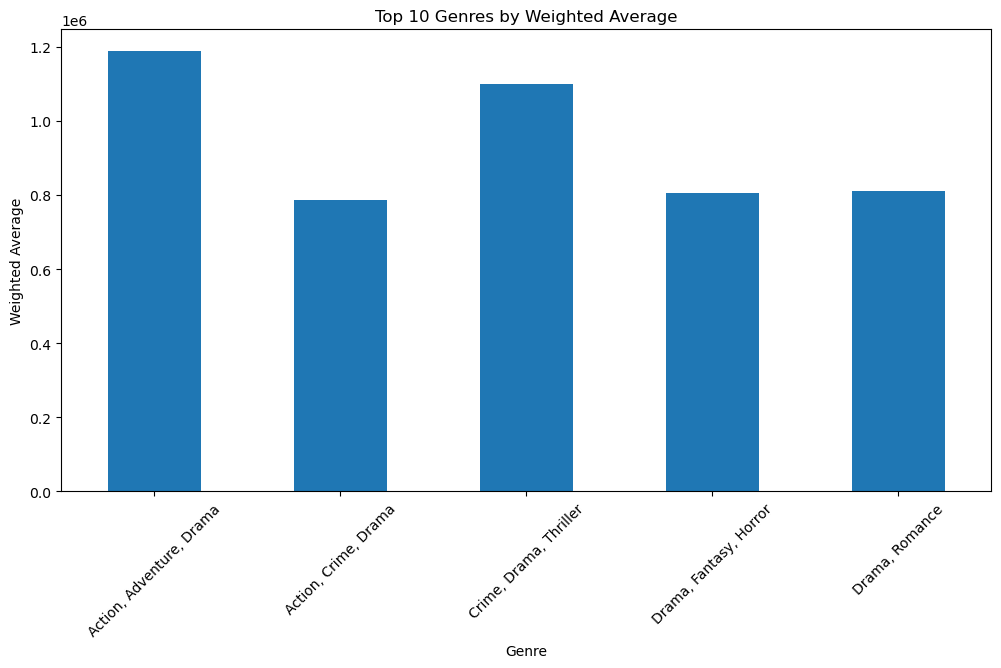

In [44]:
import matplotlib.pyplot as plt

top_10_movies = df_cleaned.sort_values('WeightedAverage', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_movies.groupby('Genre')['WeightedAverage'].mean().plot.bar()
plt.xlabel('Genre')
plt.ylabel('Weighted Average')
plt.title('Top 10 Genres by Weighted Average')
plt.xticks(rotation=45)
plt.show()

In [45]:
df_cleaned.head(10)

,Title,Certificate,Duration(mins),Genre,Rating,Description,Stars,Votes,StartYear,Protagonist,WeightedAverage
9921,The Lord of the Rings: The Fellowship of the Ring,PG-13,178.0,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075.0,2001-01-01,Peter Jackson,1290855.14
9951,Breaking Bad,TV-MA,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359.0,2008-01-01,Bryan Cranston,1281954.15
57,The Lord of the Rings: The Return of the King,PG-13,201.0,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0,2003-01-01,Peter Jackson,1273412.60
78,The Lord of the Rings: The Two Towers,PG-13,179.0,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0,2002-01-01,Peter Jackson,1149898.24
153,Gladiator,R,155.0,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0,2000-01-01,Ridley Scott,1037074.25
173,The Departed,R,151.0,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,"['Martin Scorsese', '| ', ' Stars:', 'Leona...",1310171.0,2006-01-01,Martin Scorsese,917122.25
96,Titanic,PG-13,194.0,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,"['James Cameron', '| ', ' Stars:', 'Leonard...",1158746.0,1997-01-01,James Cameron,811124.57
9948,Stranger Things,TV-14,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149902.0,2016-01-01,Millie Bobby Brown,804934.01
161,Léon: The Professional,R,110.0,"Action, Crime, Drama",8.5,12-year-old Mathilda is reluctantly taken in b...,"['Luc Besson', '| ', ' Stars:', 'Jean Reno,...",1147345.0,1994-01-01,Luc Besson,803144.05
271,Kill Bill: Vol. 1,R,111.0,"Action, Crime, Drama",8.2,"After awakening from a four-year coma, a forme...","['Quentin Tarantino', '| ', ' Stars:', 'Uma...",1103348.0,2003-01-01,Quentin Tarantino,772346.06


In [46]:
most_played = df_cleaned['Protagonist']

In [47]:
most_played = df_cleaned['Protagonist'].value_counts().head(10)

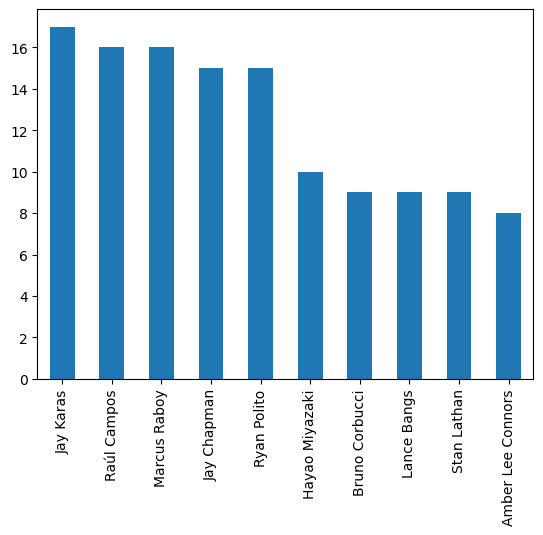

In [48]:
most_played.plot.bar()
None

In [49]:
###crosstab_table = pd.crosstab(df['Protagonist'], ) print(crosstab_table)

In [51]:
df_cleaned

,Title,Certificate,Duration(mins),Genre,Rating,Description,Stars,Votes,StartYear,Protagonist,WeightedAverage
9921,The Lord of the Rings: The Fellowship of the Ring,PG-13,178.000000,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075.0,2001-01-01,Peter Jackson,1290855.14
9951,Breaking Bad,TV-MA,49.000000,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359.0,2008-01-01,Bryan Cranston,1281954.15
57,The Lord of the Rings: The Return of the King,PG-13,201.000000,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157.0,2003-01-01,Peter Jackson,1273412.60
78,The Lord of the Rings: The Two Towers,PG-13,179.000000,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708.0,2002-01-01,Peter Jackson,1149898.24
153,Gladiator,R,155.000000,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531.0,2000-01-01,Ridley Scott,1037074.25
...,...,...,...,...,...,...,...,...,...,...,...
6216,Sergio over de grens,Not Rated,74.155023,Reality-TV,7.2,Add a Plot,"['Sergio Herman, ', 'Ella Leyers, ', 'Kürt Rog...",6.0,2022-01-01,Sergio Herman,6.36
7892,Patrick Maia: Home Office - Um show em casa,Not Rated,74.155023,Comedy,6.5,"In his second comedy special, Patrick opens th...","['Patrick Maia', '| ', ' Star:', 'Patrick M...",6.0,2017-01-01,Patrick Maia,6.15
5765,Towies,Not Rated,30.000000,Reality-TV,6.2,An Australian towing company's staff take on a...,"['Adrian Jarrett, ', 'Mike, ', 'Spooney, ', 'J...",6.0,2016-01-01,Adrian Jarrett,6.06
6629,Sitara,Not Rated,128.000000,Drama,8.0,Add a Plot,"['Ashish Ray', '| ', ' Stars:', 'Raima Sen,...",5.0,2019-01-01,Ashish Ray,5.90


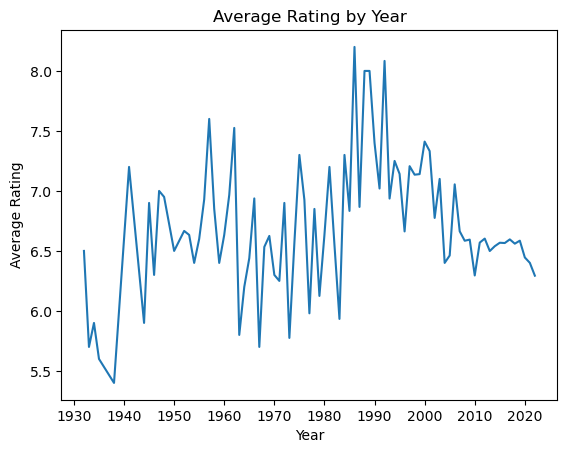

In [52]:
average_rating_by_year = df_cleaned.groupby('StartYear')['Rating'].mean()

# Create a line plot of average rating by year
plt.plot(average_rating_by_year.index, average_rating_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.show()